In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

%matplotlib inline

sbn.set(font_scale=1.5)
sbn.set_style('white')

import sys
sys.path.append('../crisprtree')
import preprocessing
from sklearn.linear_model import LogisticRegression

In [2]:
cd_df = pd.read_csv('../data/CD33/CD33.1MM.3826.csv', sep='\t')
cd_df.head()

,ConstructBarcode,MutatedSequence,WTSequence,Annotation,TranscriptID,Protein Annotation,Day21-ETP,Category
0,ACCGAGGATTGAGTAGTCCT,ACCGAGGATTGAGTAGTCCT,ACCGAGGAGTGAGTAGTCCT,"G:T,9",ENST00000262262,52.47,3.694460,Mismatch
1,ACTGAGGAGTGAGTAGTCCT,ACTGAGGAGTGAGTAGTCCT,ACCGAGGAGTGAGTAGTCCT,"C:T,3",ENST00000262262,52.47,3.391395,Mismatch
2,AGCGAGGAGTGAGTAGTCCT,AGCGAGGAGTGAGTAGTCCT,ACCGAGGAGTGAGTAGTCCT,"C:G,2",ENST00000262262,52.47,3.072724,Mismatch
3,ACCGAGGAGTGAGTAGTCCA,ACCGAGGAGTGAGTAGTCCA,ACCGAGGAGTGAGTAGTCCT,"T:A,20",ENST00000262262,52.47,3.057881,Mismatch
4,ACAGAGGAGTGAGTAGTCCT,ACAGAGGAGTGAGTAGTCCT,ACCGAGGAGTGAGTAGTCCT,"C:A,3",ENST00000262262,52.47,3.051500,Mismatch


In [3]:
from scipy.stats import gaussian_kde

(0, 1)

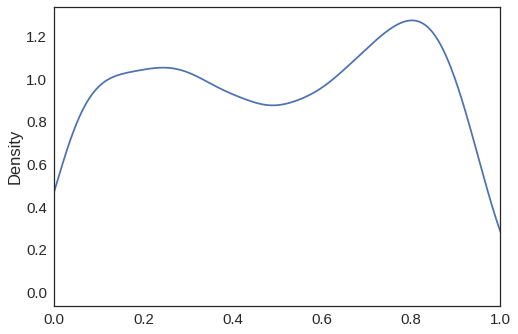

In [4]:
fig, ax = plt.subplots(1,1)

kde = gaussian_kde(cd_df['Day21-ETP'])

trans = lambda x: kde.integrate_box_1d(-np.inf, x)
cd_df['NormFrac'] = cd_df['Day21-ETP'].map(trans)
cd_df['NormFrac'].plot(kind='kde', ax=ax)
ax.set_xlim(0, 1)

In [5]:
hits = pd.DataFrame({'gRNA': cd_df['MutatedSequence'],
                     'Seq': cd_df['WTSequence'].map(lambda x: x + 'NGG')})
scores = cd_df['NormFrac']

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import f_regression

In [35]:
tr = preprocessing.MatchingTransformer().transform(hits[['gRNA', 'Seq']].values)

In [41]:
f, p = f_regression(tr, cd_df['Day21-ETP'].values)

/home/will/anaconda/envs/crisprtree/lib/python3.5/site-packages/sklearn/feature_selection/univariate_selection.py:279: RuntimeWarning: invalid value encountered in true_divide
  corr /= row_norms(X.T)
/home/will/anaconda/envs/crisprtree/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/will/anaconda/envs/crisprtree/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/will/anaconda/envs/crisprtree/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


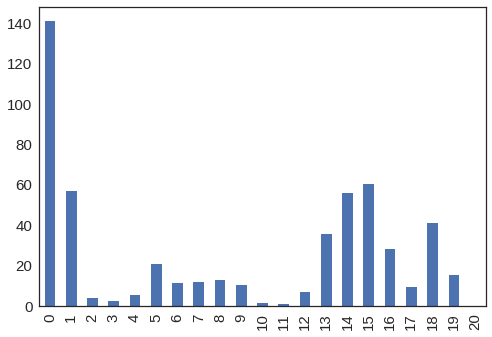

In [42]:
pd.Series(f).plot(kind='bar')

/home/will/anaconda/envs/crisprtree/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


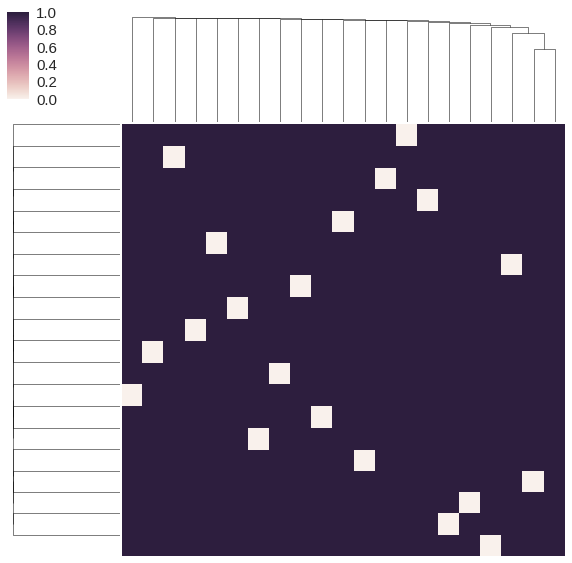

In [38]:
sbn.clustermap(tr, xticklabels=False, yticklabels=False)

In [33]:
pipe = Pipeline(steps=[('transform', preprocessing.MatchingTransformer()),
                       ('predict', LinearRegression())])

cross_val_score(pipe, hits[['gRNA', 'Seq']].values, cd_df['Day21-ETP'])

array([ 0.02966276,  0.11357594,  0.09898445])